In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import pickle

In [2]:
#Load the dataset

x = pd.read_csv("variable_selection.csv")
y = pd.read_csv("variable_labels.csv")

#Splits the dataset into 70 percent training set and 30 percent testing set
# keeping the random_state value same makes the function to split same rows into training and testing every time
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=30)

In [9]:
from datetime import timedelta
import time
#Time returns the elapsed time in seconds. This function converts that into hours, minutes and seconds
def convert_to_preferred_format(sec):
   sec = sec % (24 * 3600)
   hour = sec // 3600
   sec %= 3600
   min = sec // 60
   sec %= 60
   return "%02d:%02d:%02d" % (hour, min, sec) 
start = time.time()

import pandas
from sklearn import model_selection
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
seed = 7
kfold = model_selection.KFold(n_splits=10)
cart = DecisionTreeRegressor()
num_trees = 20
normal_model = BaggingRegressor(base_estimator=cart, n_estimators=num_trees)
normal_model.fit(x, y)
normal_predictions = normal_model.predict(x_test)
k=len(list(x_train.columns))
n = len(normal_predictions)
stop = (time.time() - start)


#Calculates and prints the time taken for training the ensemble
print('Elapsed Time:', convert_to_preferred_format(stop))
print('======'*5)
print("Ensemble")
print('======'*5)

#Evaluation metrics for the ensemble on test set
Metrics={}
Metrics['MSE']=[mean_squared_error(y_test,normal_predictions)]
Metrics['RMSE']=[np.sqrt(mean_squared_error(y_test,normal_predictions))]
Metrics['R2_Score']=[r2_score(y_test,normal_predictions)]
Metrics['Adjusted_R2_score']=[1 - ((1-r2_score(y_test,normal_predictions))*(n-1)/(n-k-1))]
metrics_df = pd.DataFrame(Metrics)
print(metrics_df)
filename = 'ensemble.sav'
pickle.dump(normal_model, open(filename, 'wb'))

c:\Users\Jack\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_bagging.py:470: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Elapsed Time: 00:00:07
Ensemble
        MSE      RMSE  R2_Score  Adjusted_R2_score
0  0.046965  0.216714  0.949405            0.94938


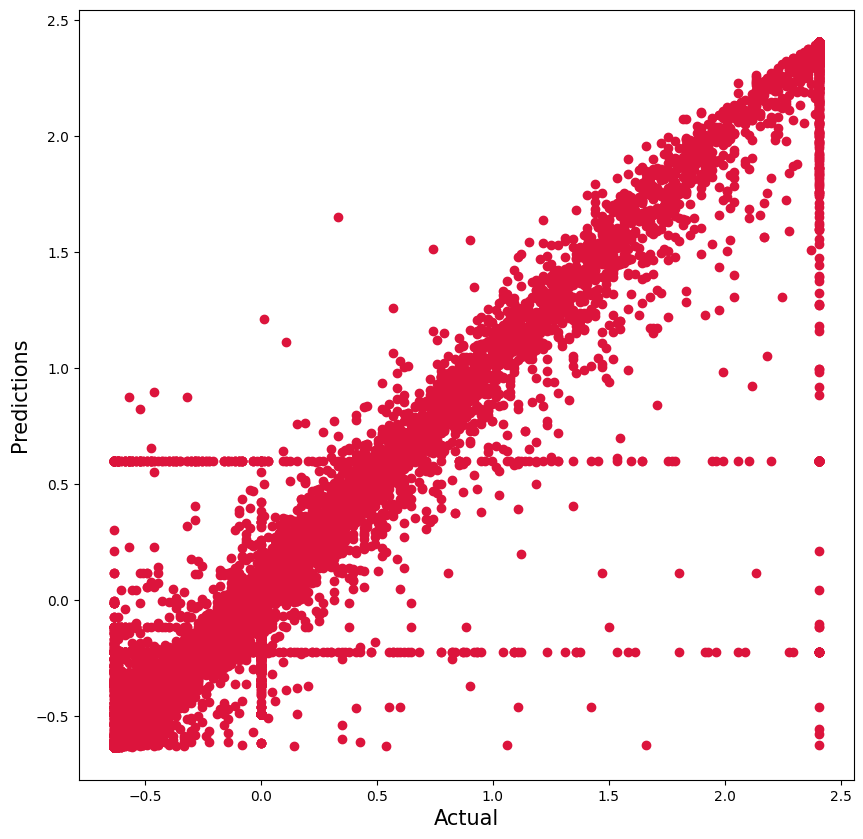

In [8]:
#Plot of actual values versus the predicted values from ensemble
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(y_test, normal_predictions, c='crimson')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()